In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from PIL import Image

In [ ]:
# read the image and normalize it
img=Image.open('data.jpg')
basewidth=1000
wpercent =( basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize))
image = np.array(img)
image = image / 255
plt.imshow(image)
plt.show()

AttributeError: module 'PIL.Image' has no attribute 'ANTIALIAS'

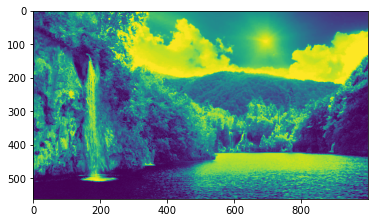

In [ ]:
plt.imshow(image[:, :, 0])# solo el rojo
plt.show()

In [ ]:
A = image[:, :, 0]
# mx n

In [ ]:
n = A.shape[0]
m = A.shape[1]
print(n)
print(m)
 #normalmente n me debe ser menor o igual m. 

562
1000


In [ ]:
U_, _S, VT_ = la.svd(A, full_matrices=True)

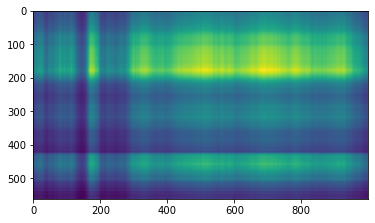

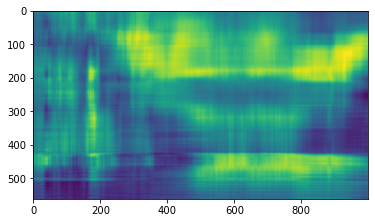

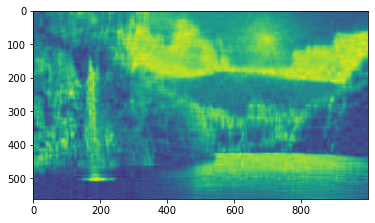

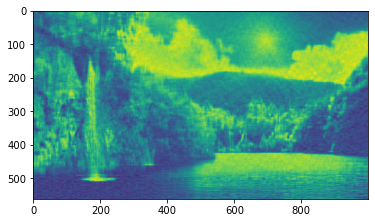

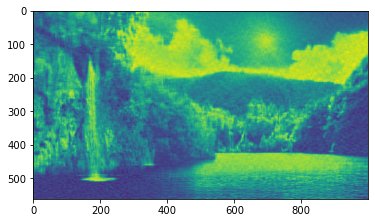

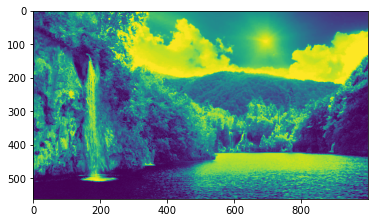

In [ ]:
rank = [1, 5, 20, 40,50]# truncando en diferentes puntos
for i in rank:
    # calculamos U*S*transpose(V) for each channel
    x = U_[:, 0:i]
    y = S_[0:i]
    xy = x.dot(np.diag(y))
    z = VT_[0:i]
    Ar = xy.dot(z)
    plt.imshow(Ar)
    plt.show()
plt.imshow(image[:, :, 0])# solo el rojo
plt.show()

$A = U S V^{T}$
donde $U U^{T}=V V^{T}=I$ y $S$ es diagonal. # ecuacion 1


$A A^{T} = U S V^{T}(U S V^{T})^{T}$
recuerde que $V V^{T}=I$.


$A A^{T} = U S V^{T}V S^{T} U^{T}$


$A A^{T} = U S I S^{T} U^{T}$

$A A^{T} = U S^{2} U^{T}$ # ecuacion 2

Por otro lado:

$A^{T} A = (U S V^{T})^{T}U S V^{T}$

$A^{T} A = V S U^{T}U S V^{T}$

$A^{T}A = V S^{2} V^{T}$ # ecuacion 3

In [ ]:


AAT = np.matmul(A, np.transpose(A))# necesitamos una matrix cuadrada para aplicar la transformacion lineal
autovalores, autovectores = np.linalg.eigh(AAT)
orden = autovalores.argsort()[::-1]
# ordenando de mayor menor
autovalores = autovalores[orden ]
autovectores = autovectores[:, orden ]
#print(AAT)
#print(autovalores)
#print(autovectores)

In [ ]:
U = autovectores # matriz de transformacion ortonormal
print(U.shape)

(562, 562)


In [ ]:
U[0:3,0:3]

array([[ 0.03634138,  0.01854115, -0.06692501],
       [ 0.03575383,  0.01782779, -0.06897655],
       [ 0.03600277,  0.01876353, -0.06805965]])

In [ ]:
np.sqrt(autovalores[560:564])

array([0.14865267, 0.12961023])

In [ ]:
S_[560:564]

array([0.14865267, 0.12961023])

In [ ]:
S=np.sqrt(autovalores)


In [ ]:
ATA = np.matmul(np.transpose(A), A)# necesitamos una matrix cuadrada para aplicar la transformacion lineal
print(ATA.shape)
autovalores2, autovectores2 = np.linalg.eigh(ATA)

(1000, 1000)


In [ ]:

orden2 = autovalores2.argsort()[::-1]
autovalores2 = autovalores2[orden2 ]
autovectores2 = autovectores2[:, orden2 ]
#print(ATA)
#print(autovalores2)
#print(autovectores2)

In [ ]:
VT =  np.transpose(autovectores2 )

In [ ]:
print(np.sum(S-S_))

6.606051816682168e-11


In [ ]:
print(np.sum(U-U_))
d=U-U_

43.63875526390302


In [ ]:
print(np.sum(VT-VT_))

49.79332664116215


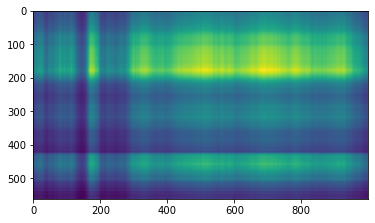

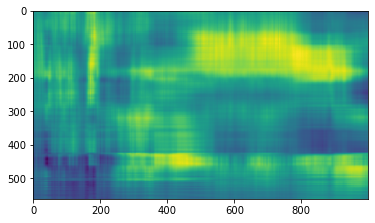

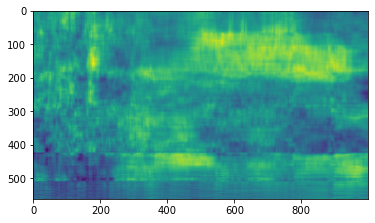

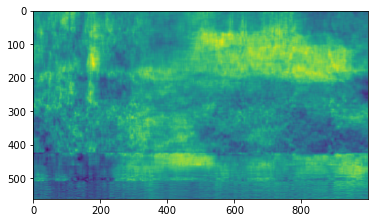

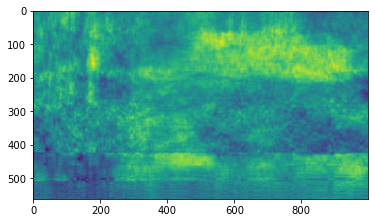

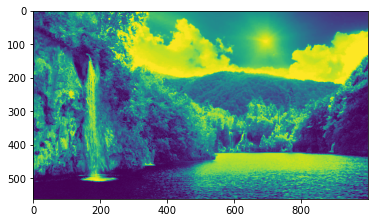

In [ ]:
rank = [1, 5, 20, 40,50]
for i in rank:
    # calculamos U*S*transpose(V) for each channel
    x = U[:, 0:i]
    y = S[0:i]
    xy = x.dot(np.diag(y))
    z = VT[0:i]
    Ar = xy.dot(z)
    plt.imshow(Ar)
    plt.show()
plt.imshow(image[:, :, 0])# solo el rojo
plt.show()


Referencia 

https://github.com/BarisSari/singular-value-decomposition